<a href="https://colab.research.google.com/github/elainedias16/AI/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [ ]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [109]:
content_line = df['content'].iloc[2220]
content_line

'bt introduc two initi help beat rogu dialler scam cost dial net user thousand may dial net user abl download free softwar stop comput use number user pre approv list inadvert download surfer rogu dialler program hijack modem dial premium rate number user log thousand uk dial user believ hit scam peopl face phone bill 2 000 bt modem protect program check number dial comput block pre approv nation net servic provid number icsti uk premium rate servic watchdog say look compani take lead initi initi welcom spokesperson icsti tell bbc news websit pleas see put place new measur protect consum second initi bt announc earli warn system alert bt custom unusu activ phone bill bill rise substanti usual daili averag call make suspect number text voic alert send user landlin phone part clamp rogu dialler compani must satisfi stringent condit includ clear term condit inform delet dialler respons custom refund firm run dialler without permiss close icsti watchdog bring action last octob follow decis

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


In [105]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [104]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

df = pre_processing(df)
df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,bt introduc two initi help beat rogu dialler s...
2221,tech,398.txt,Spam e-mails tempt net shoppers,comput user across world continu ignor secur w...
2222,tech,399.txt,Be careful how you code,new european direct could put softwar writer r...
2223,tech,400.txt,US cyber security chief resigns,man make sure us comput network safe secur res...
2224,tech,401.txt,Losing yourself in online gaming,onlin role play game time consum enthral fligh...


# Basic statistics analysis

{'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}


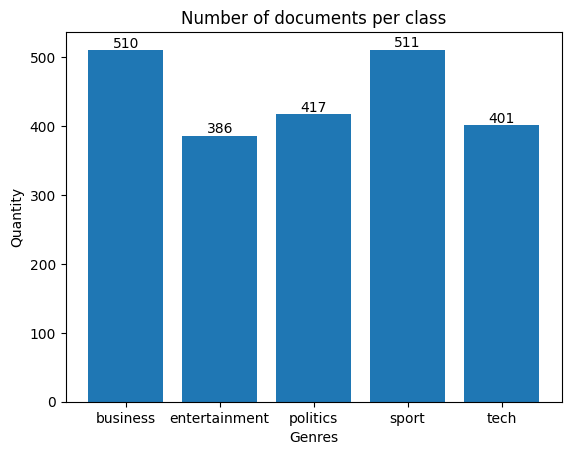

In [149]:
import matplotlib.pyplot as plt
import seaborn

genres = df['genre'].unique()

def qtd_doc_genres():
  qtd_genres = {}
  for genre in genres:
      count = df[df['genre'] == genre]['genre'].count()
      qtd = { genre : count}
      qtd_genres.update(qtd)
  return qtd_genres


qtd_genres = qtd_doc_genres()
qtd = qtd_genres.values()
print(qtd_genres)

plt.xlabel('Genres')
plt.ylabel('Quantity')
plt.title('Number of documents per class')
bars = plt.bar(genres , qtd)


# y_pos = [i + 1 for i in range(len(qtd))]
# for i, val in enumerate(qtd):
#     plt.text(i, y_pos[i], str(val), ha='center')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, str(height), ha='center', va='bottom')


plt.show()

In [154]:
from collections import Counter
import re

# Sample text data (replace this with your database or text documents)
text_data = [
    "This is a sample text. This text contains some words. Some words are repeated.",
    "Another sample text with different words.",
    "Yet another sample text with more words."
]

all_text = ' '.join(text_data)

words = re.findall(r'\b\w+\b', all_text.lower())

stop_words = set(['the', 'and', 'is', 'are', 'this', 'with', 'in', 'to', 'a', 'some'])
words = [word for word in words if word not in stop_words]
print(words)
# Count the occurrences of each word
word_counts = Counter(words)
print(word_counts)
# # Display the top N most frequent words
# top_n = 10
# print(f"Top {top_n} most frequent words:")
# for word, count in word_counts.most_common(top_n):
#     print(f"{word}: {count}")


['sample', 'text', 'text', 'contains', 'words', 'words', 'repeated', 'another', 'sample', 'text', 'different', 'words', 'yet', 'another', 'sample', 'text', 'more', 'words']
Counter({'text': 4, 'words': 4, 'sample': 3, 'another': 2, 'contains': 1, 'repeated': 1, 'different': 1, 'yet': 1, 'more': 1})


In [171]:
def get_genre_content(df, genre):
  # content = df.loc[df['genre'] == genre, 'content']
  content = get_genre_content(df, 'genres')

  return content


content = get_genre_content(df, 'tech')

RecursionError: maximum recursion depth exceeded